<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/7-KNN-wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
red_wine = pd.read_csv('winequality-red.csv')

In [4]:
target = red_wine['quality']
features = red_wine.drop('quality', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [6]:
rms_error = []

for K in range (1, 76):
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(X_train, Y_train)
  pred = model.predict (X_test)
  error = mean_squared_error(Y_test, pred, squared=False)
  rms_error.append(error)

In [7]:
x = np.linspace(1,75, num = 75)
y = rms_error

In [8]:
x.shape

(75,)

In [9]:
len(y)

75

In [10]:
#y.sort()

In [11]:
y[0]

0.82915619758885

In [12]:
y[1]

0.7277963314004818

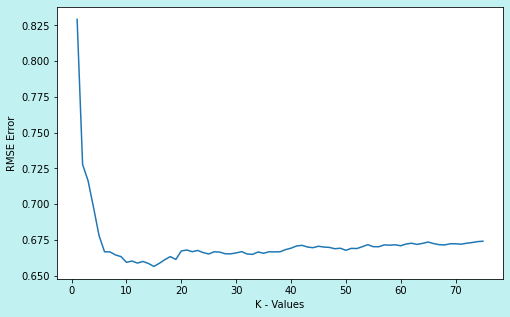

In [13]:
fig, ax = plt.subplots(figsize=(8, 5), facecolor="#c1f1f1")
ax.plot(x, y)

#annot_optimum(x, y)
plt.xlabel('K - Values')
plt.ylabel('RMSE Error')
plt.show ( )